In [44]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import missingno as msno

import seaborn as sns

from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


from sklearn.metrics import (silhouette_score, adjusted_rand_score)

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer

from sklearn import manifold
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn import decomposition

In [45]:
# importer les données 

df = pd.read_csv('data_features0.csv')

In [46]:
def plot_value_counts(col_name,df):       
    
    values_count = pd.DataFrame(df[col_name].dropna().value_counts())
    #print (values_count.shape)
    values_count.columns = ['count']
    # convert the index column into a regular column.
    values_count[col_name] = [ str(i) for i in values_count.index ]
    # add a column with the percentage of each data point to the sum of all data points.
    values_count['percent'] = values_count['count'].div(values_count['count'].sum()).multiply(100).round(2)
    # change the order of the columns.
    values_count = values_count.reindex([col_name,'count','percent'],axis=1)
    values_count.reset_index(drop=True,inplace=True)
    return (values_count)

In [47]:
def entrainement_model2_robust(mod_data):    
    
    # rescaling features
    X = mod_data  
    mod1_data = QuantileTransformer(output_distribution='normal').fit_transform(X)
   
    # étude du coeficient de silhouette pour différent nombre de clusters et sauvegarde des labels

    # nombre de cluster 
    clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]
    
    # coef silhouette 
    silhouette = []   
        
   
    for k in range (len(clusters)):        
        
        # appliquer le k-means (sur les données d'entrainement)
        kmeans = KMeans(n_clusters=int(clusters[k]),init='k-means++' ,random_state=0).fit(mod1_data)
        # enregistrer les labels 
        labels_train = kmeans.labels_
        # coeficient de silhouette correspondant
        silhouette.append(silhouette_score(mod1_data, kmeans.labels_, metric='euclidean'))        
        
                    
    # mettre les données dans un datasets    
    
    d = {'cluster': clusters, 'silhouette':silhouette}
    coef_df = pd.DataFrame(data=d)
    
    return (coef_df)

In [48]:
def visualisation_reduite_robust(df,n_clusters):
    """visualiser les clusters par tsne isomap a acp2d"""
    # ouvrir les annotations 
    
    title = pd.read_csv('fc_users_conv_red.csv')
    X = df
    
    df = QuantileTransformer(output_distribution='normal').fit_transform(X)
    
    
    
    # ---------------------------- appliquer isomap (structure plutôt globale)----------------------------------

    iso = manifold.Isomap(n_neighbors=4,      
                           n_components=2)
    X_iso = iso.fit_transform(df)
    
    # appliquer le k-means sur les données réduites
    kmeans = KMeans(n_clusters=int(n_clusters),init='k-means++' ,random_state=0).fit(X_iso)
    
    # représenter les données 

    fig, ax = plt.subplots(figsize=(15, 15))  

    #for i in range(title.shape[0]):    

        #ax.annotate(title.iloc[i,2], (X_iso[i,0], X_iso[i,1]),size=6)
    plt.scatter(X_iso[:, 0], X_iso[:, 1],c=kmeans.labels_)
    plt.title("Clustorisation et visualisation via l'algorithme isomap")
    #plt.axis([-2, 2, -2, 2])
    plt.savefig('user_map.png', dpi=400)
    plt.show()
    
    # ------------------------ appliquer l'algorithme tsne (structure plutôt locale) --------------------------------   
    
    tsne = manifold.TSNE(n_components=2, perplexity=50, n_iter=3000,init='pca' )
    X_tsne = tsne.fit_transform(df)
    
    # appliquer le k-means sur les données réduites
    kmeans = KMeans(n_clusters=int(n_clusters),init='k-means++' ,random_state=0).fit(X_tsne)
    # représenter les données 

    fig, ax = plt.subplots(figsize=(15, 15))  

    #for i in range(title.shape[0]):    

        #ax.annotate(title.iloc[i,2], (X_tsne[i,0], X_tsne[i,1]),size=6)
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1],c=kmeans.labels_)
    plt.title("Clustorisation et visualisation via l'algorithme Tsne")
    #plt.axis([-2, 2, -2, 2])
    plt.savefig('user_map.png', dpi=400)
    plt.show()
    
    # ---------------------------------- appliquer une ACP linéaire en 2d ----------------------------------
    
    pca = decomposition.PCA(n_components=2) 
    pca.fit(df)
    print ('pourcentage de variance expliqué en deux dimensions')
    print (pca.explained_variance_ratio_.sum())
    X_projected = pca.transform(df)
    
    # appliquer le k-means sur les données réduites
    kmeans = KMeans(n_clusters=int(n_clusters),init='k-means++' ,random_state=0).fit(X_projected)
    # représenter les données 

    fig, ax = plt.subplots(figsize=(15, 15))  

    #for i in range(title.shape[0]):    

        #ax.annotate(title.iloc[i,2], (X_projected[i,0], X_projected[i,1]),size=6)
    plt.scatter(X_projected[:, 0], X_projected[:, 1],c=kmeans.labels_)
    plt.title("Clustorisation et visualisation via l'algorithme une ACP")
    #plt.axis([-2, 2, -2, 2])
    plt.savefig('user_map.png', dpi=400)
    plt.show()        
         

# Scénario 1 > fréquence de transaction / le montant moyen par transaction par utilisateur / le nombre d'unités de transaction moyen par utilisateur / le prix moyen par unité par utilisateur


Ce groupe de variable répond à la nécesité de caractériser d'une part, les gros consomateurs des petits et d'autre part les consomateurs consommant peu de ceux qui consomment beaucoup. Cela pourrait s'avérer utile, notemment dans le but de faire des efforts marketings particuliers sur des clients suceptibles de consommer plus, de concentrer ces efforts sur des items à petits ou gros montants

In [49]:
mod_train = np.matrix(df.iloc[:,[3,4,5,9]])

In [50]:
coef_df = entrainement_model2_robust(mod_data=mod_train)

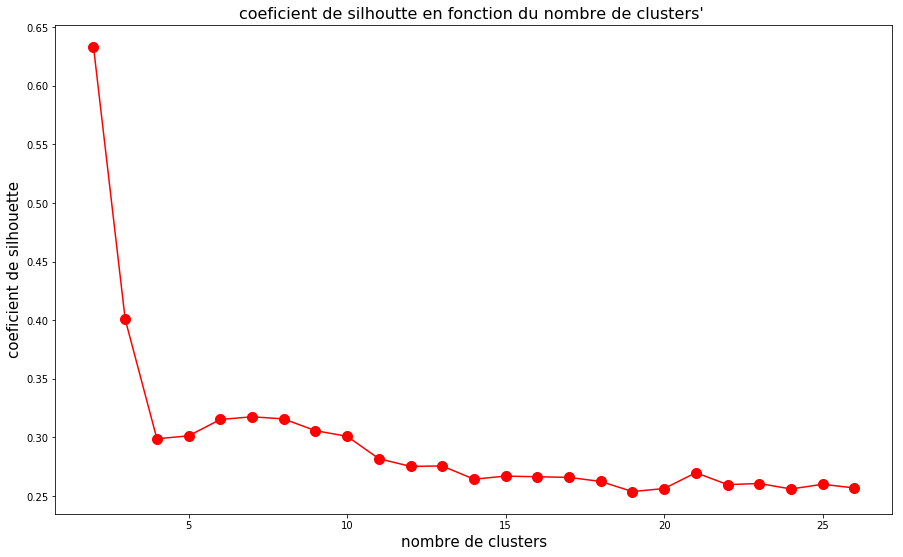

In [8]:
# visualisation des coeficients 
f, (ax1) = plt.subplots(1, 1, figsize=(15, 9), sharex=True)

plt.plot(coef_df.iloc[:,0], coef_df.iloc[:,1],'-', markersize=6, c='red')
plt.plot(coef_df.iloc[:,0], coef_df.iloc[:,1],'ro', markersize=10, c='red')
#plt.plot(coef_tot.iloc[:,0], coef_tot.iloc[:,2],'ro', markersize=6, c='blue')
plt.title("coeficient de silhoutte en fonction du nombre de clusters' ",fontsize=16)

ax1.set_xlabel("nombre de clusters",fontsize=15)
ax1.set_ylabel("coeficient de silhouette",fontsize=15)
plt.savefig('pict_reg_time1', dpi=400)
plt.show()

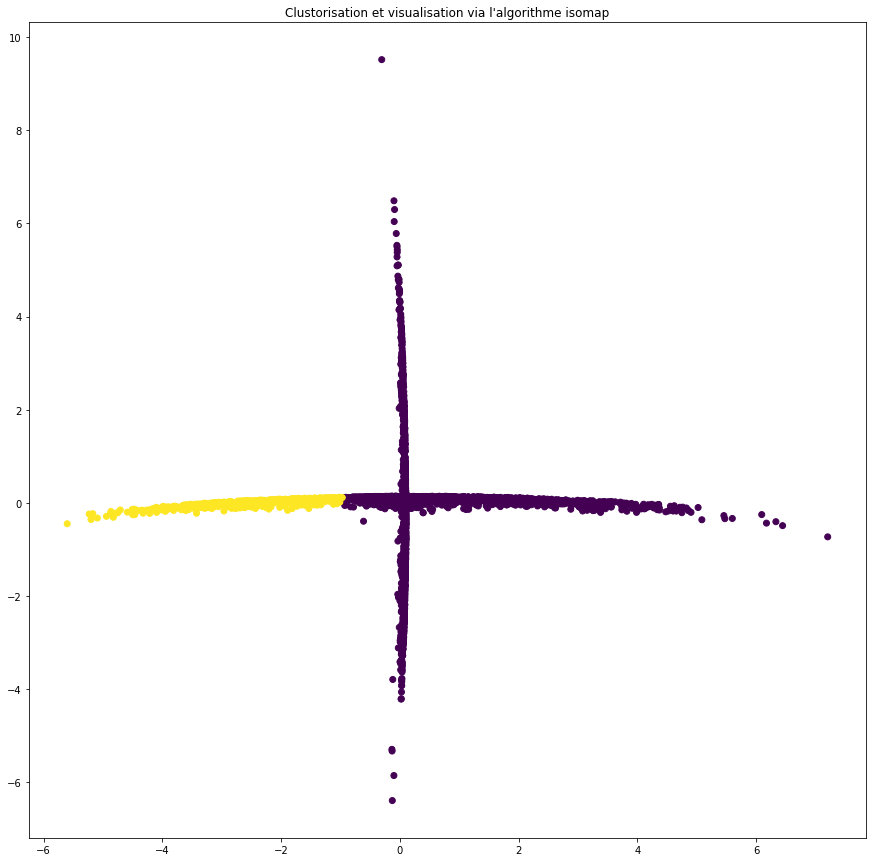

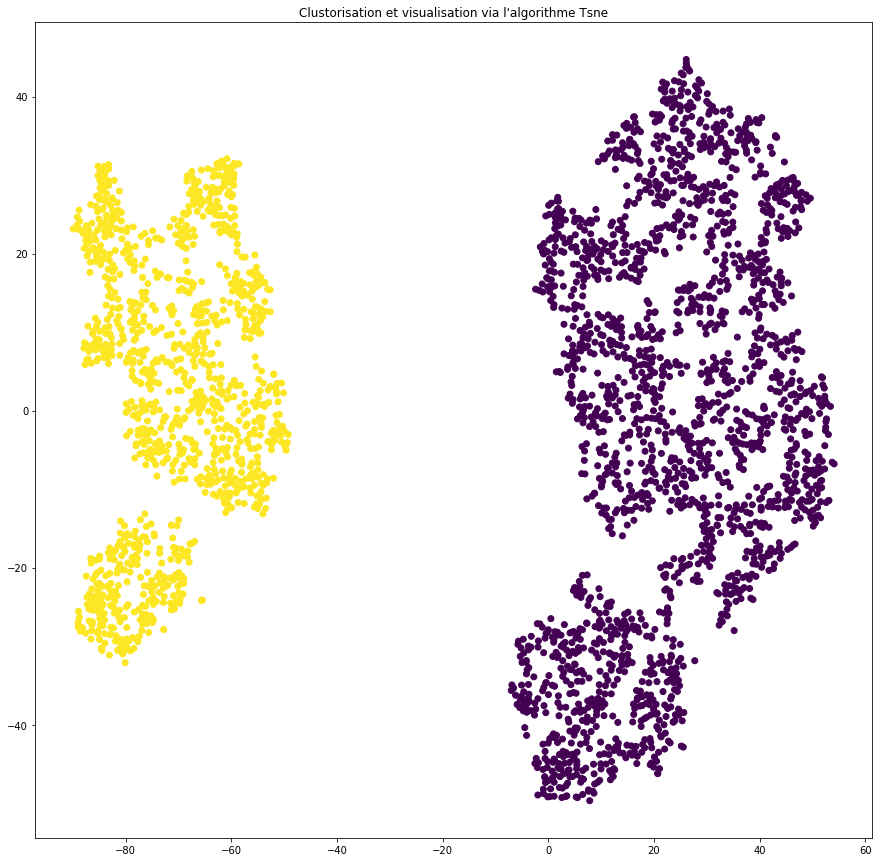

pourcentage de variance expliqué en deux dimensions
0.8877949694250397


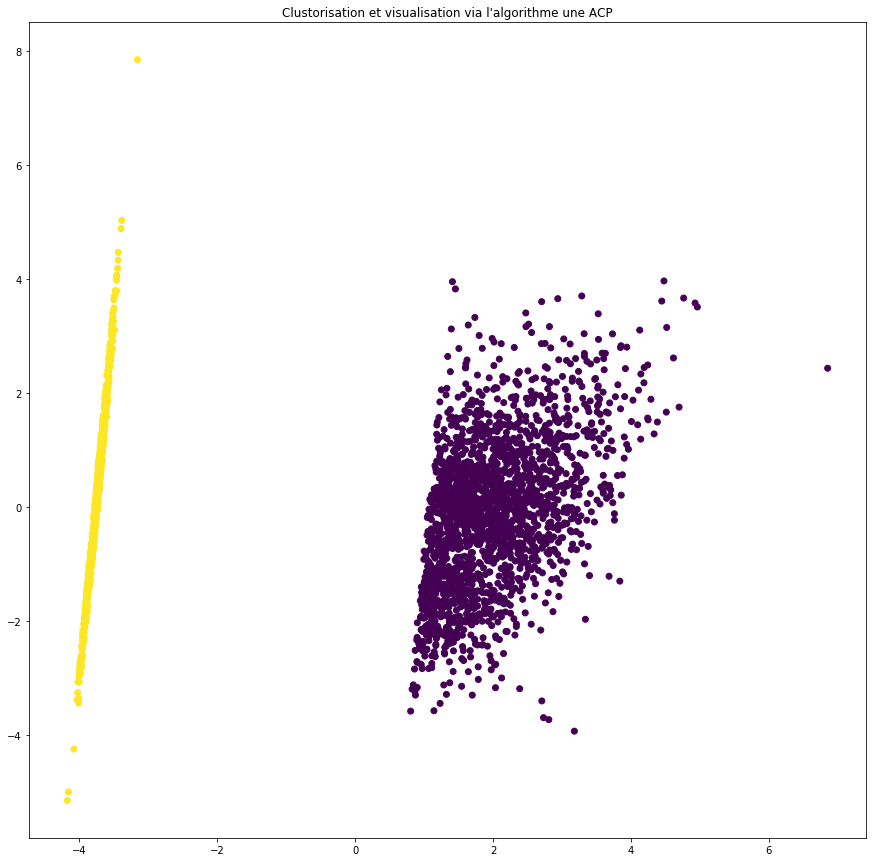

In [11]:
# visualisation des groupes utilisateurs

visualisation_reduite_robust(df=mod_train,n_clusters=2)

In [25]:
# appliquer le k-means

df_test = mod_train

# standardiser les données 
df_test = QuantileTransformer(output_distribution='normal').fit_transform(df_test)


kmeans = KMeans(n_clusters=2,init='k-means++' ,random_state=0).fit(df_test)

dim = df_test.shape[0]

# interprétation 

# visualiser les valeurs statistiques des caractéristiques de chaque clusters (moyenne/mediane/variance)
clusters = [0.,1.]

# moyenne 

frequence = []
montant_transaction_moy = []
nb_unit_transaction_moy = []
prix_unit_moy = []

# dimension du cluster

dimension = []

# préparer les données pour l'enregistrement

label_save = kmeans.labels_
df_testsave = df_test


# convertir kmeans.labels_ en vecteur
kmeans.labels_ = np.matrix((kmeans.labels_))
kmeans.labels_ = np.transpose(kmeans.labels_)



for l in range (len(clusters)):
    
    X_inter = np.concatenate((df_test,kmeans.labels_), axis=1) 
    
    X_inter = X_inter[[np.where(X_inter[:,4] == clusters[l])]]   
    
    frequence.append(np.mean(X_inter[0,:,0]))
    montant_transaction_moy.append(np.mean(X_inter[0,:,3]))
    nb_unit_transaction_moy.append(np.mean(X_inter[0,:,1]))
    prix_unit_moy.append(np.mean(X_inter[0,:,2]))
    
    # dimension en pourcentage
    dimension.append(X_inter.shape[1]*100/dim)
    
# arranger les données dans un dataframe pandas 


d = {'cluster':clusters[:],'frequence':frequence[:],'montant_transaction':montant_transaction_moy[:],
     'nb_unit':nb_unit_transaction_moy[:],'prix_unit':prix_unit_moy[:],'dimension':dimension[:]
    }

stat_cluster = pd.DataFrame(data=d)

stat_cluster

,cluster,frequence,montant_transaction,nb_unit,prix_unit,dimension
0,0.0,-0.077942,-5.199338,-0.006876,-0.043504,34.84801
1,1.0,0.035498,0.568676,0.003865,0.023649,65.15199


In [26]:
# on donne un nom caractéristique à chaque cluster et on enregistre les données : 
   
save_map = pd.DataFrame(data=df_testsave)  
save_map['cluster'] = label_save[:]

cluster_num = [0,1]

cluster_annot = ['Montants faibles pour des utilisateurs plutôt irréguliers pour des produits légérement moins chers que la moyenne ',
                 'Montants des transactions élevés pour des utilisateurs plutôt réguliers pour des produits légérement plus chers que la moyenne'                 
                ]

label_liste = []
for i in range (len(kmeans.labels_)):
    label_liste.append(kmeans.labels_[i])


d = {'user':df.iloc[:,1],'label':label_liste[:]}
user_label = pd.DataFrame(data=d)

d = {'cluster_num':cluster_num[:],'cluster_annot':cluster_annot[:]}
cluster_annot = pd.DataFrame(data=d)

In [27]:
# sauvegarde : 
user_label.to_csv('user_label1.csv')
save_map.to_csv("savemapN1.csv")
cluster_annot.to_csv('cluster_annotN1.csv')

# Scénario 2 > montant moyen généré par transaction par utilisateur / le nombre moyen d'unités par commandes / le nombre de produits différents dans une même commande / le pays (uk ou étranger)¶


Ce groupe de variables permet de mettre en relief des éventuelles différences comportementales en fonction de l'origine du consommateur 

In [28]:
mod_train = np.matrix(df.iloc[:,[3,5,6,7]])


In [29]:
coef_df = entrainement_model2_robust(mod_data=mod_train)

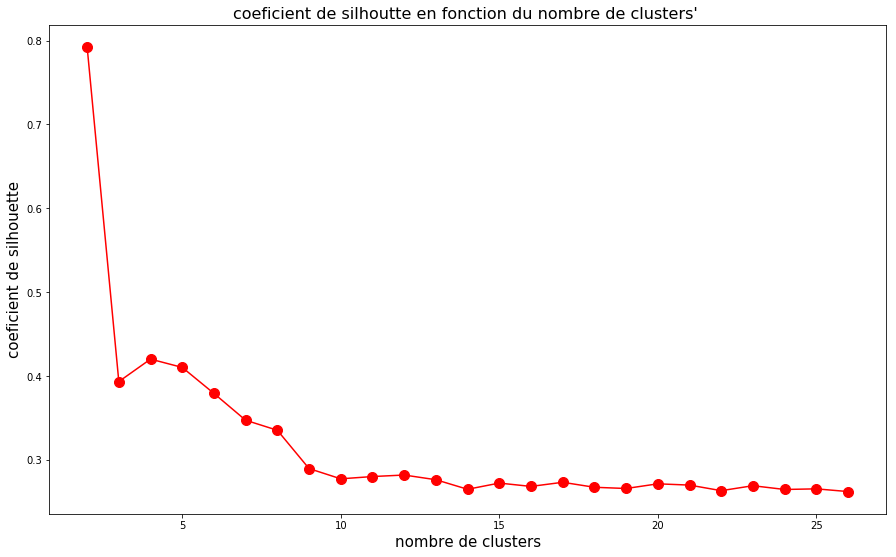

In [17]:
# visualisation des coeficients 
f, (ax1) = plt.subplots(1, 1, figsize=(15, 9), sharex=True)

plt.plot(coef_df.iloc[:,0], coef_df.iloc[:,1],'-', markersize=6, c='red')
plt.plot(coef_df.iloc[:,0], coef_df.iloc[:,1],'ro', markersize=10, c='red')
#plt.plot(coef_tot.iloc[:,0], coef_tot.iloc[:,2],'ro', markersize=6, c='blue')
plt.title("coeficient de silhoutte en fonction du nombre de clusters' ",fontsize=16)

ax1.set_xlabel("nombre de clusters",fontsize=15)
ax1.set_ylabel("coeficient de silhouette",fontsize=15)
plt.savefig('pict_reg_time1', dpi=400)
plt.show()

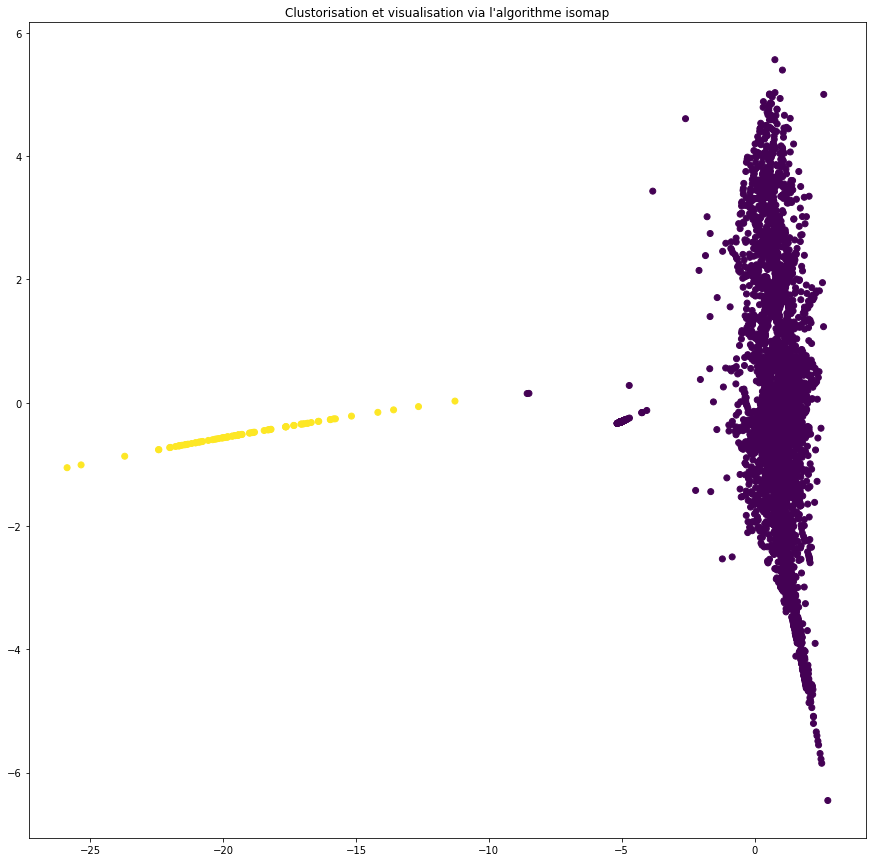

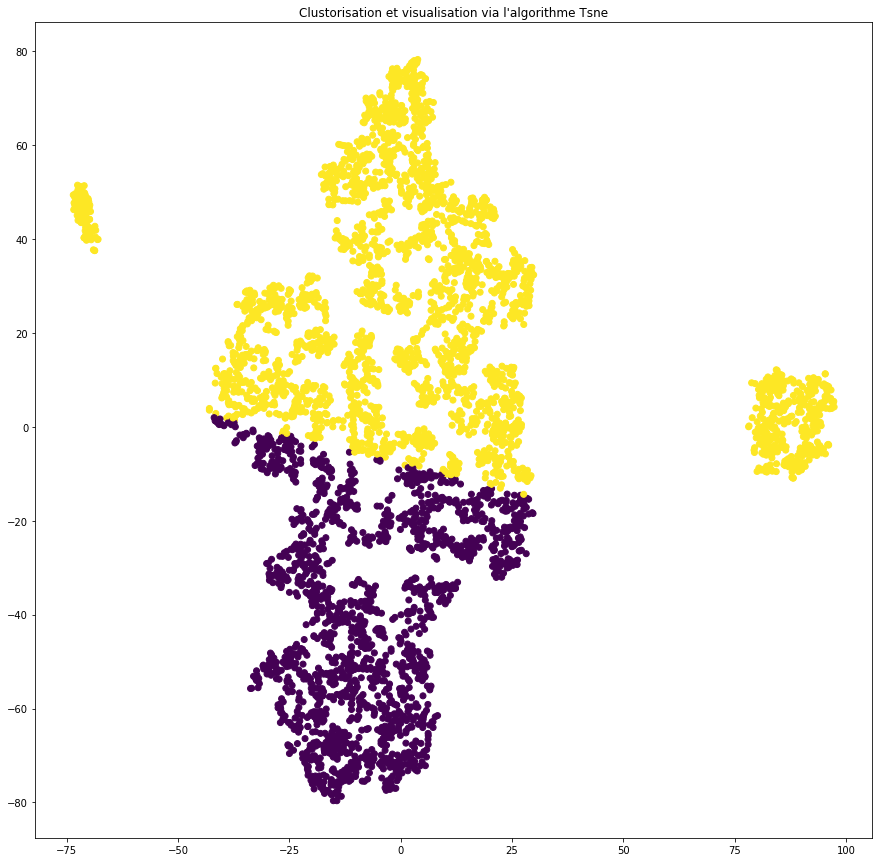

pourcentage de variance expliqué en deux dimensions
0.9227912155574031


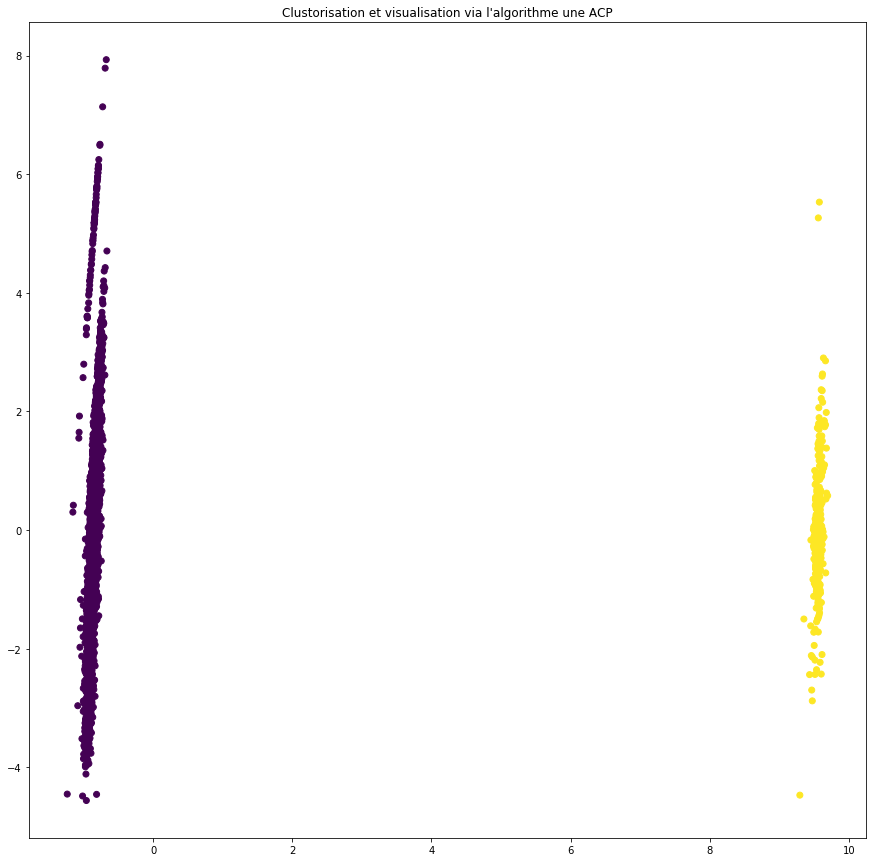

In [28]:
# visualisation des groupes utilisateurs

visualisation_reduite_robust(df=mod_train,n_clusters=2)

In [30]:
# appliquer le k-means

df_test = mod_train

# standardiser les données 
df_test = QuantileTransformer(output_distribution='normal').fit_transform(df_test)


kmeans = KMeans(n_clusters=2,init='k-means++' ,random_state=0).fit(df_test)

dim = df_test.shape[0]

# interprétation 

# visualiser les valeurs statistiques des caractéristiques de chaque clusters (moyenne/mediane/variance)
clusters = [0.,1.]

# moyenne 

nb_unit = []
montant = []
pays = []
nb_produit_diff = []

# dimension du cluster

dimension = []

# préparer les données pour l'enregistrement

label_save = kmeans.labels_
df_testsave = df_test


# convertir kmeans.labels_ en vecteur
kmeans.labels_ = np.matrix((kmeans.labels_))
kmeans.labels_ = np.transpose(kmeans.labels_)



for l in range (len(clusters)):
    
    X_inter = np.concatenate((df_test,kmeans.labels_), axis=1) 
    
    X_inter = X_inter[[np.where(X_inter[:,4] == clusters[l])]]   
    
    nb_unit.append(np.mean(X_inter[0,:,0]))
    montant.append(np.mean(X_inter[0,:,1]))
    pays.append(np.mean(X_inter[0,:,2]))
    nb_produit_diff.append(np.mean(X_inter[0,:,3]))
    
    # dimension en pourcentage
    dimension.append(X_inter.shape[1]*100/dim)
    
# arranger les données dans un dataframe pandas 


d = {'clusters':clusters[:],'nb_unit':nb_unit[:],'montant':montant[:],
     'pays':pays[:],'nb_produit_diff':nb_produit_diff[:],'dimension':dimension[:]
    }

stat_cluster = pd.DataFrame(data=d)

stat_cluster

,clusters,nb_unit,montant,pays,nb_produit_diff,dimension
0,0.0,-0.026811,-0.025052,5.199338,-0.079728,91.75807
1,1.0,0.249555,0.281910,-5.199338,0.157552,8.24193


In [32]:
# on donne un nom caractéristique à chaque cluster et on enregistre les données : 
   
save_map = pd.DataFrame(data=df_testsave)  
save_map['cluster'] = label_save[:]

cluster_num = [0,1]

cluster_annot = [
                'Montants plutôt faibles en plutôt faible quantité pour des clients britaniques avec un nombre plutôt faible de produits différents par transaction',
                "Montants élevés, en forte quantité pour des clients possiblement étrangers avec un nombre plutôt important de produits différents par transaction"
                ]

label_liste = []
for i in range (len(kmeans.labels_)):
    label_liste.append(kmeans.labels_[i])


d = {'user':df.iloc[:,1],'label':label_liste[:]}
user_label = pd.DataFrame(data=d)


d = {'cluster_num':cluster_num[:],'cluster_annot':cluster_annot[:]}
cluster_annot = pd.DataFrame(data=d)

In [33]:
# sauvegarde : 
user_label.to_csv('user_label2')
save_map.to_csv("savemapN2.csv")
cluster_annot.to_csv('cluster_annotN2.csv')

# Ajout de nouvelles variables > Scénario 3

On ajoute ici de nouvelles variables, la date de la dernière transaction, le jour et l'heure du maximum de transactions, la probabilité qu'une transaction ai lieu ce jour (heure) précis ainsi que les variables de popularité

In [63]:
mod_train = np.matrix(df.iloc[:,2::])

In [52]:
coef_df = entrainement_model2_robust(mod_data=mod_train)

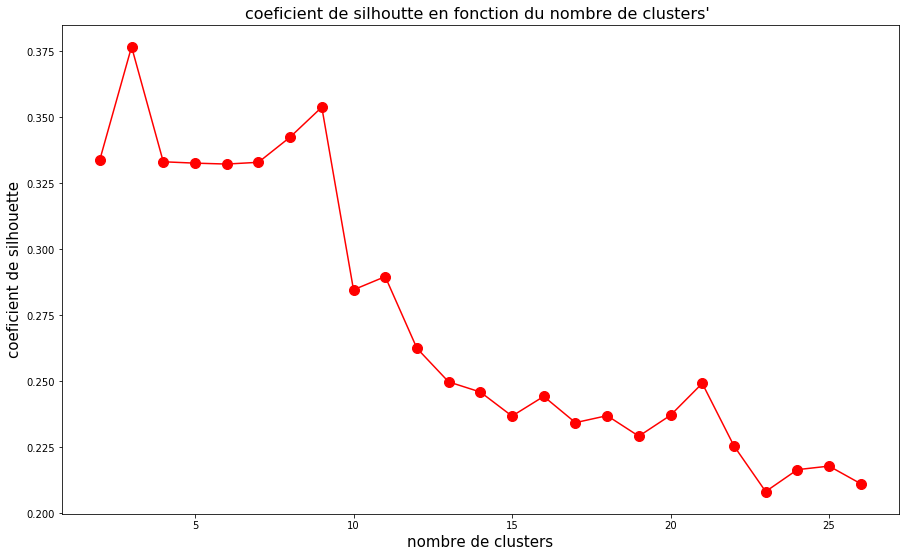

In [65]:
# visualisation des coeficients 
f, (ax1) = plt.subplots(1, 1, figsize=(15, 9), sharex=True)

plt.plot(coef_df.iloc[:,0], coef_df.iloc[:,1],'-', markersize=6, c='red')
plt.plot(coef_df.iloc[:,0], coef_df.iloc[:,1],'ro', markersize=10, c='red')
#plt.plot(coef_tot.iloc[:,0], coef_tot.iloc[:,2],'ro', markersize=6, c='blue')
plt.title("coeficient de silhoutte en fonction du nombre de clusters' ",fontsize=16)

ax1.set_xlabel("nombre de clusters",fontsize=15)
ax1.set_ylabel("coeficient de silhouette",fontsize=15)
plt.savefig('pict_reg_time1', dpi=400)
plt.show()

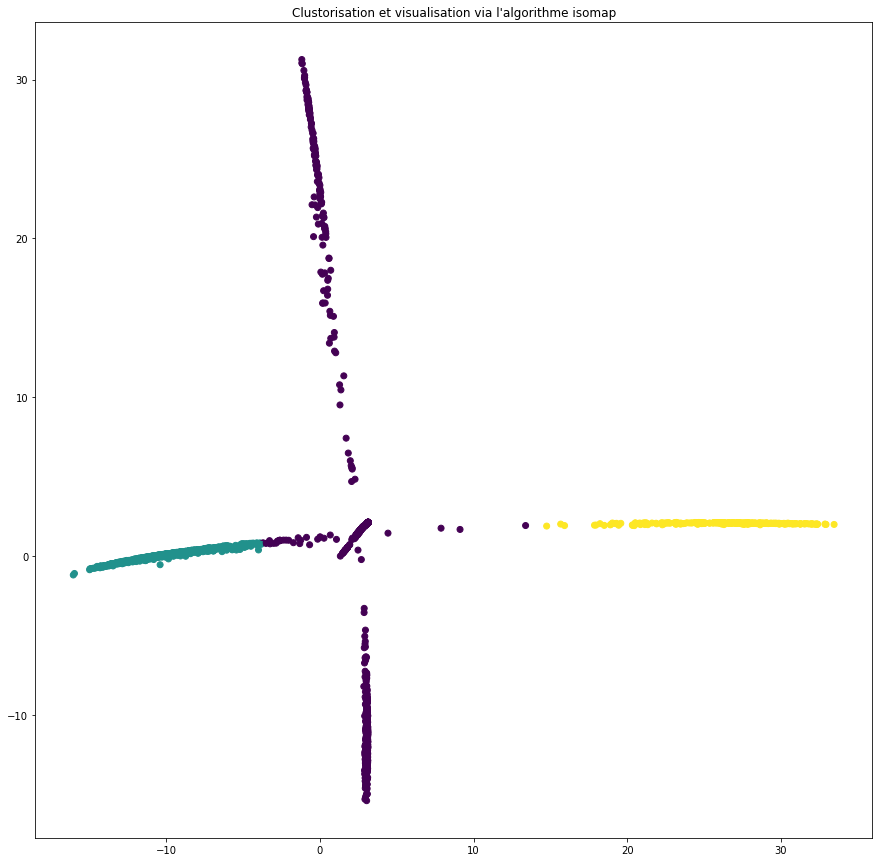

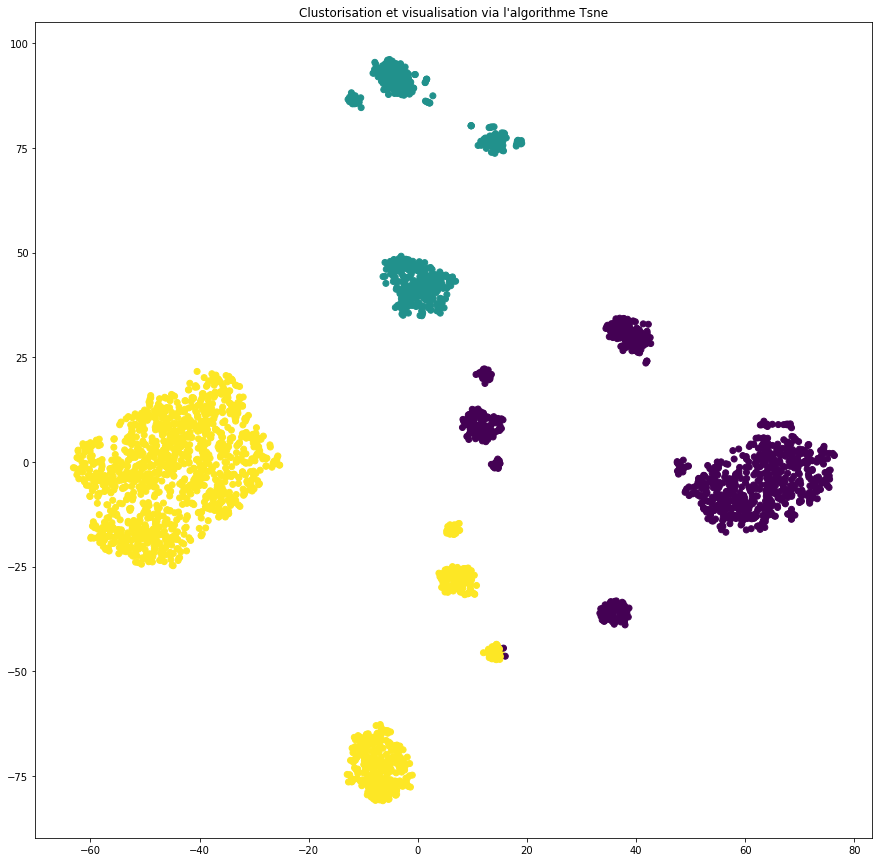

pourcentage de variance expliqué en deux dimensions
0.5468560645200065


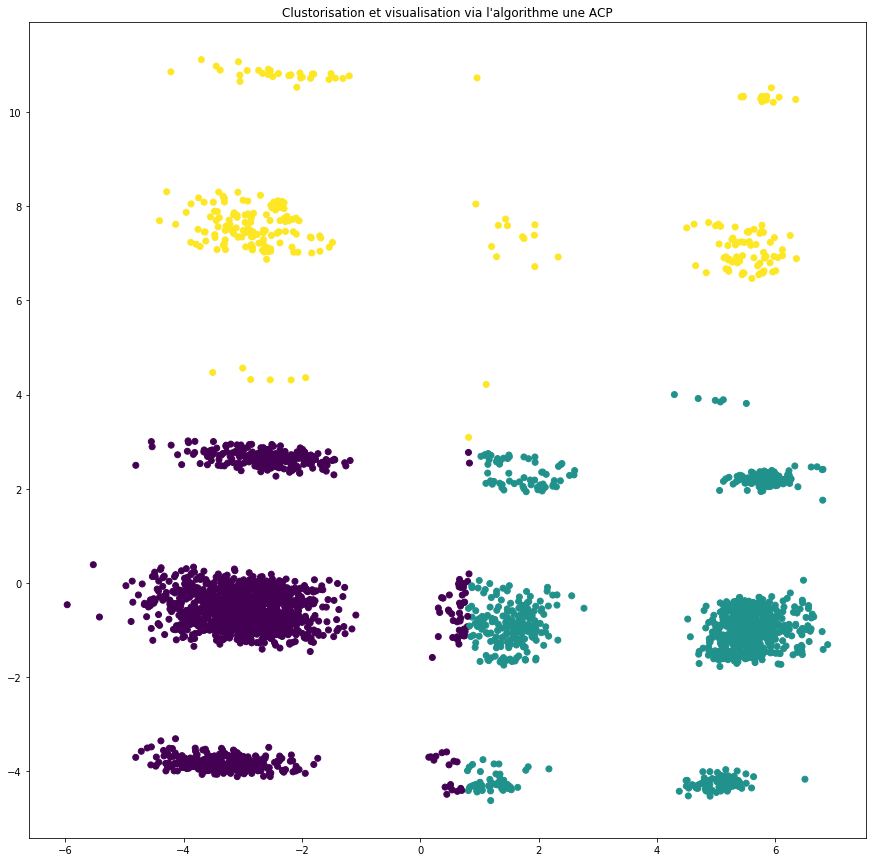

In [24]:
# Un maximum (3)

# visualisation des groupes utilisateurs

visualisation_reduite_robust(df=mod_train,n_clusters=3)

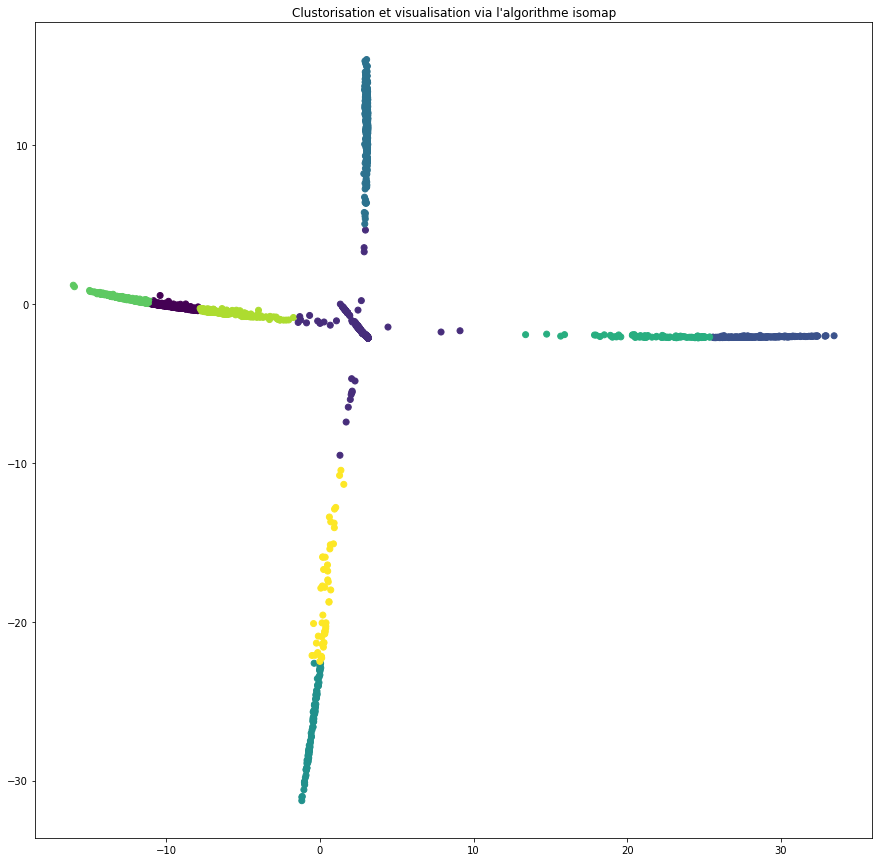

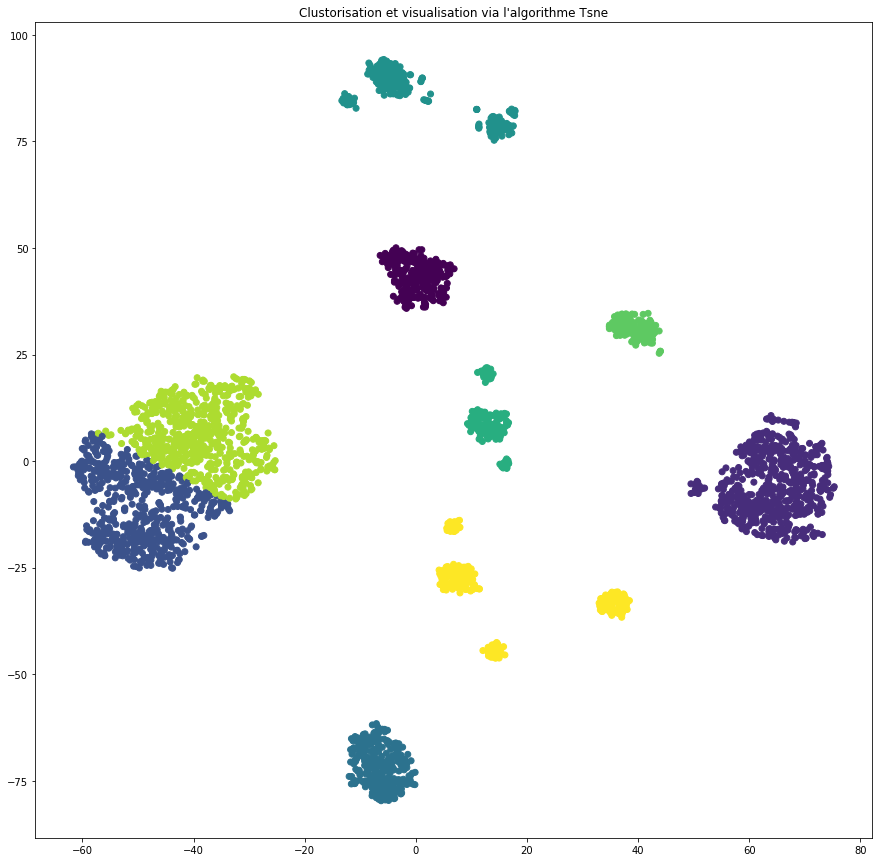

pourcentage de variance expliqué en deux dimensions
0.5468560645200073


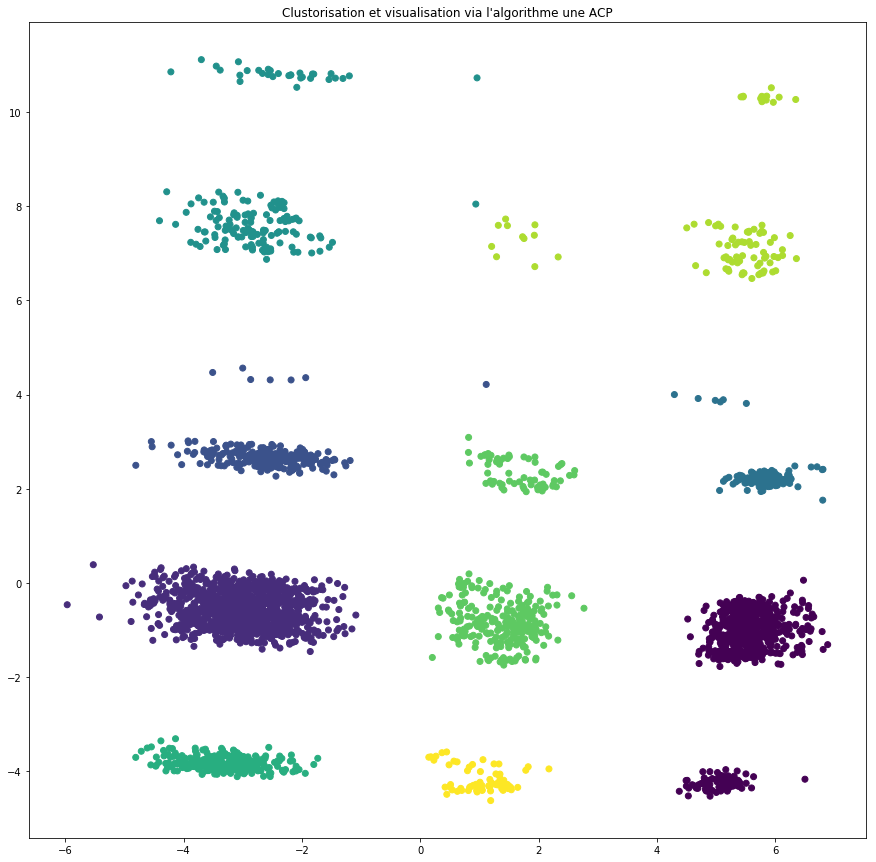

In [25]:
# et un maximum local (9)

# visualisation des groupes utilisateurs

visualisation_reduite_robust(df=mod_train,n_clusters=9)

In [60]:
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> pour 3 clusters <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

# appliquer le k-means

df_test = mod_train

# standardiser les données 
df_test = QuantileTransformer(output_distribution='normal').fit_transform(df_test)


kmeans = KMeans(n_clusters=3,init='k-means++' ,random_state=0).fit(df_test)

dim = df_test.shape[0]

# interprétation 

# visualiser les valeurs statistiques des caractéristiques de chaque clusters (moyenne/mediane/variance)
clusters = [0.,1.,2.]

# moyenne 

last_trans = []
nb_unit = []
prix_unit = []
montant = []
pays = []
nb_produit_diff = []
nb_produit_id = []
frequence = []
jourmax = []
heuremax = []
jourprob = []
heureprob = []
prop1 = []
prop2 = []

# dimension du cluster

dimension = []

# préparer les données pour l'enregistrement

label_save = kmeans.labels_
df_testsave = df_test

# convertir kmeans.labels_ en vecteur
kmeans.labels_ = np.matrix((kmeans.labels_))
kmeans.labels_ = np.transpose(kmeans.labels_)

for l in range (len(clusters)):
    
    X_inter = np.concatenate((df_test,kmeans.labels_), axis=1) 
    
    
    X_inter = X_inter[[np.where(X_inter[:,14] == clusters[l])]]   
    
    last_trans.append(np.mean(X_inter[0,:,0]))
    nb_unit.append(np.mean(X_inter[0,:,1]))
    prix_unit.append(np.mean(X_inter[0,:,2]))
    montant.append(np.mean(X_inter[0,:,3]))
    pays.append(np.mean(X_inter[0,:,4]))
    nb_produit_diff.append(np.mean(X_inter[0,:,5]))
    nb_produit_id.append(np.mean(X_inter[0,:,6]))
    frequence.append(np.mean(X_inter[0,:,7]))
    jourmax.append(np.mean(X_inter[0,:,8]))
    heuremax.append(np.mean(X_inter[0,:,9]))
    jourprob.append(np.mean(X_inter[0,:,10]))
    heureprob.append(np.mean(X_inter[0,:,11]))
    prop1.append(np.mean(X_inter[0,:,12]))
    prop2.append(np.mean(X_inter[0,:,13]))
    
    # dimension en pourcentage
    dimension.append(X_inter.shape[1]*100/dim)
    
# arranger les données dans un dataframe pandas 


d = {'clusters':clusters[:],'last_trans':last_trans[:],'nb_unit':nb_unit[:],'prix_unit':prix_unit[:],
     'montant':montant[:],'pays':pays[:],'nb_produit_diff':nb_produit_diff[:],'nb_produit_id':nb_produit_id[:],
     'frequence':frequence[:],'jourmax':jourmax[:],'heuremax':heuremax[:],'jourprob':jourprob[:],'heureprob':heureprob[:],
     'prop1':prop1,'prop2':prop2,'dimension':dimension[:]
    }

stat_cluster = pd.DataFrame(data=d)

stat_cluster

,clusters,last_trans,nb_unit,prix_unit,montant,pays,nb_produit_diff,nb_produit_id,frequence,jourmax,heuremax,jourprob,heureprob,prop1,prop2,dimension
0,0.0,0.643874,-0.076650,0.004649,-0.043788,5.199338,-0.261097,-4.302967,-4.901928,-0.190890,-0.005324,-0.770414,-0.756257,-0.023475,-0.041427,33.970542
1,1.0,-0.375659,0.002486,0.006982,-0.014038,5.199338,0.026890,0.279161,0.594264,0.010800,0.040961,0.435137,0.423585,0.014055,0.035286,57.787527
2,2.0,-0.022331,0.249555,-0.066632,0.281910,-5.199338,0.157552,-1.580696,-1.450641,-0.601422,-0.252624,0.130852,0.130806,-0.002940,-0.078066,8.241930


In [61]:
# on donne un nom caractéristique à chaque cluster et on enregistre les données : 
   
save_map = pd.DataFrame(data=df_testsave)  
save_map['cluster'] = label_save[:]


cluster_num = [0,1,2]

cluster_annot = [ 
                'Montant moyen, de clients souvent britaniques, très irrégulières, avec peu de transactions redondantes et peu de produits différents par commande',
                'Montant moyen, de clients souvent britaniques, assez réguliers, de produits plutôt populaires',
                'Montants plutôt élevés, de clients possiblement étrangers, en plutôt grande quantité, assez irrégulières, de produits plutôt rares avec peu de transactions redondantes '
                ]

label_liste = []
for i in range (len(kmeans.labels_)):
    label_liste.append(kmeans.labels_[i])


d = {'user':df.iloc[:,1],'label':label_liste[:]}
user_label = pd.DataFrame(data=d)

d = {'cluster_num':cluster_num[:],'cluster_annot':cluster_annot[:]}
cluster_annot = pd.DataFrame(data=d)


In [38]:
# sauvegarde : 
user_label.to_csv('user_label3.csv')
save_map.to_csv("savemapN3.csv")
cluster_annot.to_csv('cluster_annotN3.csv')

In [62]:
label_liste = []
for i in range (len(kmeans.labels_)):
    label_liste.append(kmeans.labels_[i])

d = {'user':df.iloc[:,1],'label':label_liste[:]}
user_label = pd.DataFrame(data=d)

user_label.to_csv('user_label3.csv')


In [53]:
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> pour 9 clusters <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

# appliquer le k-means

df_test = mod_train

# standardiser les données 
df_test = QuantileTransformer(output_distribution='normal').fit_transform(df_test)


kmeans = KMeans(n_clusters=9,init='k-means++' ,random_state=0).fit(df_test)

dim = df_test.shape[0]

# interprétation 

# visualiser les valeurs statistiques des caractéristiques de chaque clusters (moyenne/mediane/variance)
clusters = [0.,1.,2.,3.,4.,5.,6.,7.,8.]

# moyenne 

last_trans = []
nb_unit = []
prix_unit = []
montant = []
pays = []
nb_produit_diff = []
nb_produit_id = []
frequence = []
jourmax = []
heuremax = []
jourprob = []
heureprob = []
prop1 = []
prop2 = []

# dimension du cluster

dimension = []

# préparer les données pour l'enregistrement

label_save = kmeans.labels_
df_testsave = df_test

# convertir kmeans.labels_ en vecteur
kmeans.labels_ = np.matrix((kmeans.labels_))
kmeans.labels_ = np.transpose(kmeans.labels_)

for l in range (len(clusters)):
    
    X_inter = np.concatenate((df_test,kmeans.labels_), axis=1) 
    
    
    X_inter = X_inter[[np.where(X_inter[:,14] == clusters[l])]]   
    
    last_trans.append(np.mean(X_inter[0,:,0]))
    nb_unit.append(np.mean(X_inter[0,:,1]))
    prix_unit.append(np.mean(X_inter[0,:,2]))
    montant.append(np.mean(X_inter[0,:,3]))
    pays.append(np.mean(X_inter[0,:,4]))
    nb_produit_diff.append(np.mean(X_inter[0,:,5]))
    nb_produit_id.append(np.mean(X_inter[0,:,6]))
    frequence.append(np.mean(X_inter[0,:,7]))
    jourmax.append(np.mean(X_inter[0,:,8]))
    heuremax.append(np.mean(X_inter[0,:,9]))
    jourprob.append(np.mean(X_inter[0,:,10]))
    heureprob.append(np.mean(X_inter[0,:,11]))
    prop1.append(np.mean(X_inter[0,:,12]))
    prop2.append(np.mean(X_inter[0,:,13]))
    
    # dimension en pourcentage
    dimension.append(X_inter.shape[1]*100/dim)
    
# arranger les données dans un dataframe pandas 


d = {'clusters':clusters[:],'last_trans':last_trans[:],'nb_unit':nb_unit[:],'prix_unit':prix_unit[:],
     'montant':montant[:],'pays':pays[:],'nb_produit_diff':nb_produit_diff[:],'nb_produit_id':nb_produit_id[:],
     'frequence':frequence[:],'jourmax':jourmax[:],'heuremax':heuremax[:],'jourprob':jourprob[:],'heureprob':heureprob[:],
     'prop1':prop1,'prop2':prop2,'dimension':dimension[:]
    }

stat_cluster = pd.DataFrame(data=d)

stat_cluster

,clusters,last_trans,nb_unit,prix_unit,montant,pays,nb_produit_diff,nb_produit_id,frequence,jourmax,heuremax,jourprob,heureprob,prop1,prop2,dimension
0,0.0,-0.405312,0.098282,-0.007485,0.082622,5.199338,-0.011067,0.650143,0.567739,0.035954,0.039924,0.467806,0.450196,0.068693,0.090930,38.232529
1,1.0,0.718890,0.137757,0.054397,0.205882,5.199338,-0.617979,-5.199338,-5.199338,0.615661,-0.023346,-1.004237,-0.990207,0.103732,0.090337,21.717330
2,2.0,-0.440676,0.350352,-0.123446,0.344975,-5.199338,0.185703,0.442322,0.475001,-0.618861,-0.334373,0.539502,0.522763,-0.056174,-0.131875,5.202131
3,3.0,-0.351838,-0.032337,0.017102,-0.040843,5.199338,0.128960,0.536364,0.528468,-5.199338,0.007987,0.535902,0.492166,-0.042446,-0.018185,7.959887
4,4.0,0.435230,-1.134701,-0.213333,-1.235503,5.199338,1.181761,-0.137818,-5.199338,1.729261,0.363184,0.022514,0.068049,-0.397229,-0.498549,4.951426
5,5.0,0.693600,0.077056,0.030595,0.173986,-5.199338,0.109375,-5.042767,-4.746069,-0.571578,-0.112724,-0.568488,-0.539966,0.088161,0.014020,3.039799
6,6.0,0.537084,-0.066597,-0.069546,-0.072357,5.199338,-0.068074,-4.188469,-5.089397,-5.199338,-0.213767,-0.648136,-0.657921,-0.215780,-0.186952,5.515512
7,7.0,0.171948,0.281440,0.214119,0.322504,5.199338,-0.699405,-5.199338,1.023066,-0.280609,-0.104705,-0.585375,-0.593094,-0.084513,0.005457,5.233469
8,8.0,-0.388880,-0.544831,-0.018488,-0.586027,5.199338,0.452400,0.582006,0.402995,5.199338,0.126648,0.633187,0.682156,-0.113793,-0.146139,8.147916


In [59]:
label_liste = []
for i in range (len(kmeans.labels_)):
    label_liste.append(kmeans.labels_[i])

d = {'user':df.iloc[:,1],'label':label_liste[:]}
user_label = pd.DataFrame(data=d)

# sauvegarde : 
user_label.to_csv('user_label3BIS.csv')
save_map.to_csv("savemapN3.csv")

# Scénario par mois 

Ce groupe de variables met, entre autre, en relief la notion de temps et cherche à caractériser des utilisateurs qui sont suceptibles d'être plus actifs à certaines periodes de l'année, avant Noel par exemple ou avant les vacances d'été.

In [6]:
df_train = pd.read_csv('data_features_m0.csv')

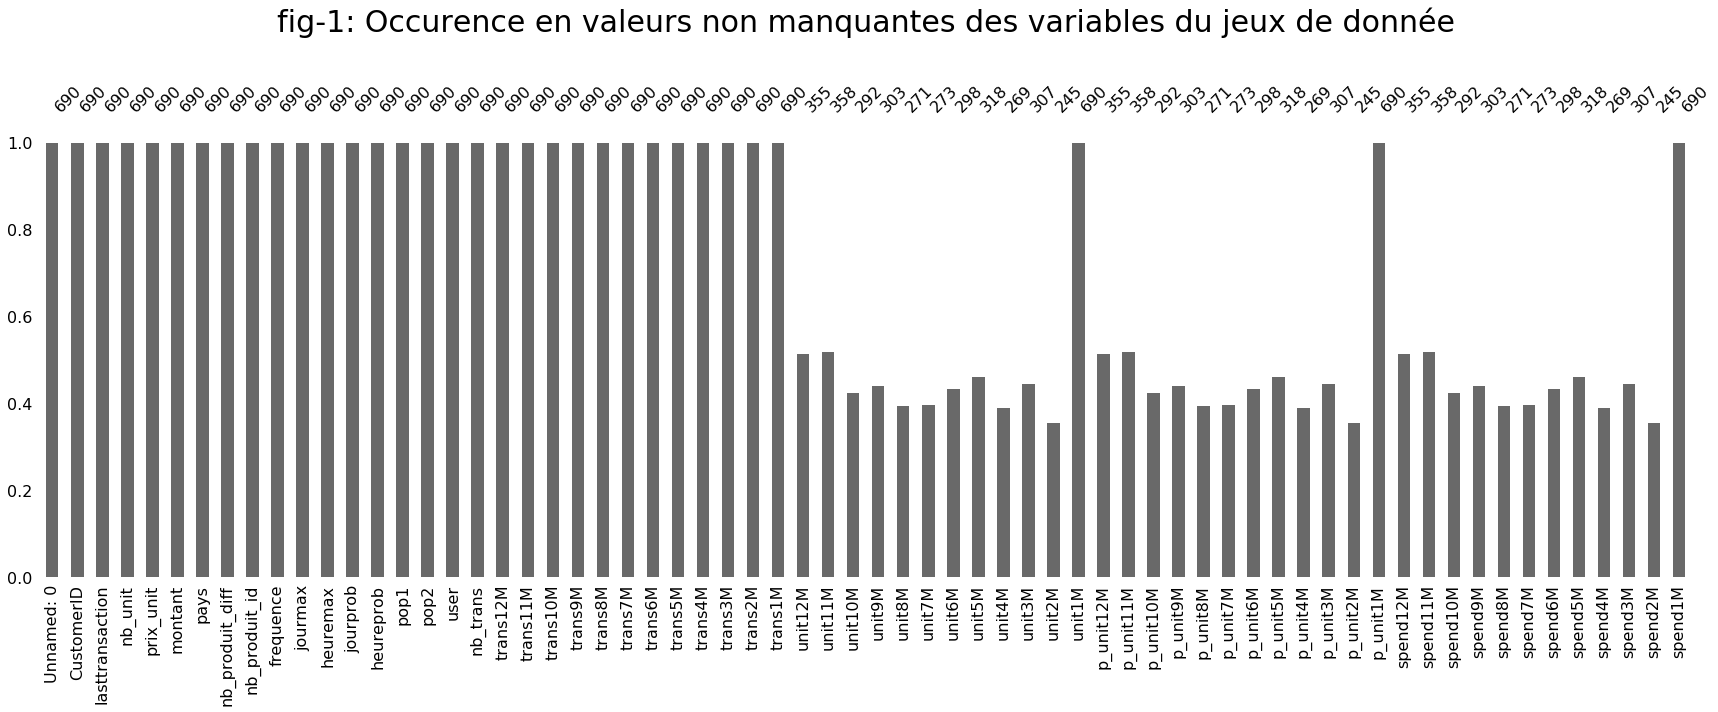

In [7]:
# visualisation des données dans le cas du testset
mat = msno.bar(df_train)
mat.axes.get_xaxis().set_visible(True)
mat.axes.get_yaxis().set_visible(True)
plt.title('fig-1: Occurence en valeurs non manquantes des variables du jeux de donnée',fontsize=30,loc='center', pad = 90)
plt.tight_layout(h_pad=2)
plt.savefig('occurences.png', dpi=400)

In [8]:
df_train = df_train.fillna(0)
df_train = df_train.drop(columns = ['user'])
    
mod_train = np.matrix(df_train.iloc[:,2::])

In [9]:
coef_df = entrainement_model2_robust(mod_data=mod_train)

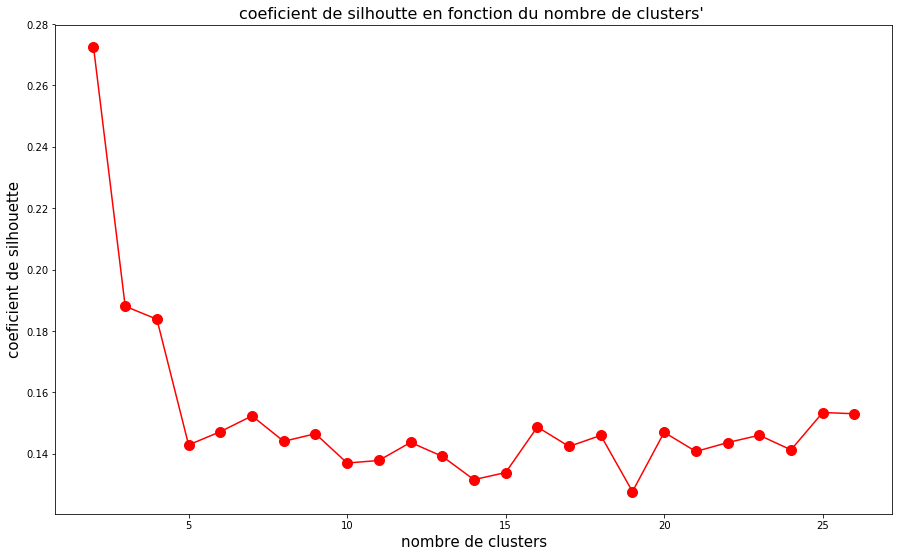

In [10]:
# visualisation des coeficients 
f, (ax1) = plt.subplots(1, 1, figsize=(15, 9), sharex=True)

plt.plot(coef_df.iloc[:,0], coef_df.iloc[:,1],'-', markersize=6, c='red')
plt.plot(coef_df.iloc[:,0], coef_df.iloc[:,1],'ro', markersize=10, c='red')
#plt.plot(coef_tot.iloc[:,0], coef_tot.iloc[:,2],'ro', markersize=6, c='blue')
plt.title("coeficient de silhoutte en fonction du nombre de clusters' ",fontsize=16)

ax1.set_xlabel("nombre de clusters",fontsize=15)
ax1.set_ylabel("coeficient de silhouette",fontsize=15)
plt.savefig('pict_reg_time1', dpi=400)
plt.show()

In [14]:
# on établie une pca sur les données "mois" pour les réduire à deux dimensions sans perdre en explication

df_train = pd.read_csv('data_features_m0.csv')

df_train = df_train.fillna(0)
df_train = df_train.drop(columns = ['user'])

    
mod_train = np.matrix(df_train.iloc[:,17::])
    
pca = decomposition.PCA(n_components=1) 
pca.fit(mod_train)
mod_train2 = pca.transform(mod_train)
print ('pourcentage de variance expliqué en deux dimensions')
print (pca.explained_variance_ratio_.sum())
    

    
mod_train1 = np.matrix(df_train.iloc[:,[2,3,4,5,7,8,9,10,11,12,13,14,15]])

mod_train = np.concatenate((mod_train1,mod_train2), axis=1)
print (mod_train.shape)

coef_df = entrainement_model2_robust(mod_data=mod_train)

pourcentage de variance expliqué en deux dimensions
0.9514951089668029
(690, 14)


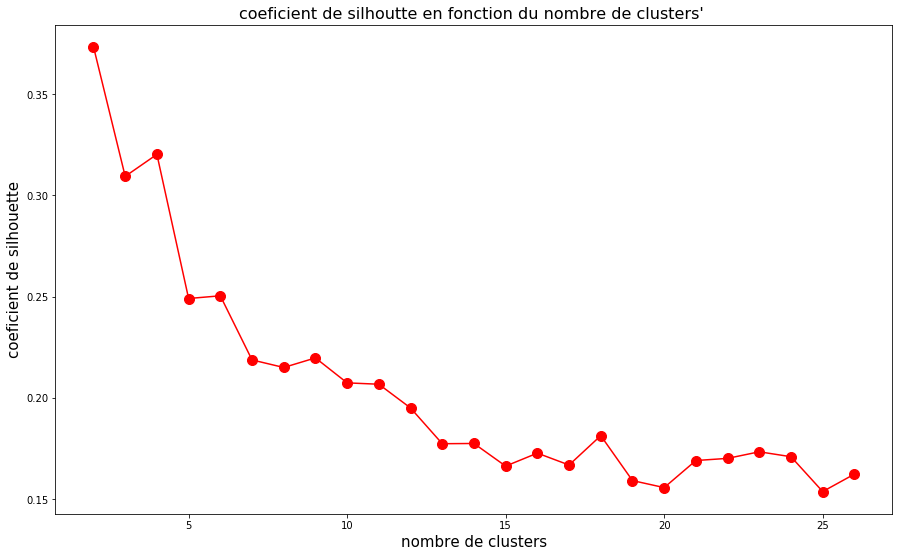

In [15]:
# visualisation des coeficients 
f, (ax1) = plt.subplots(1, 1, figsize=(15, 9), sharex=True)

plt.plot(coef_df.iloc[:,0], coef_df.iloc[:,1],'-', markersize=6, c='red')
plt.plot(coef_df.iloc[:,0], coef_df.iloc[:,1],'ro', markersize=10, c='red')
#plt.plot(coef_tot.iloc[:,0], coef_tot.iloc[:,2],'ro', markersize=6, c='blue')
plt.title("coeficient de silhoutte en fonction du nombre de clusters' ",fontsize=16)

ax1.set_xlabel("nombre de clusters",fontsize=15)
ax1.set_ylabel("coeficient de silhouette",fontsize=15)
plt.savefig('pict_reg_time1', dpi=400)
plt.show()

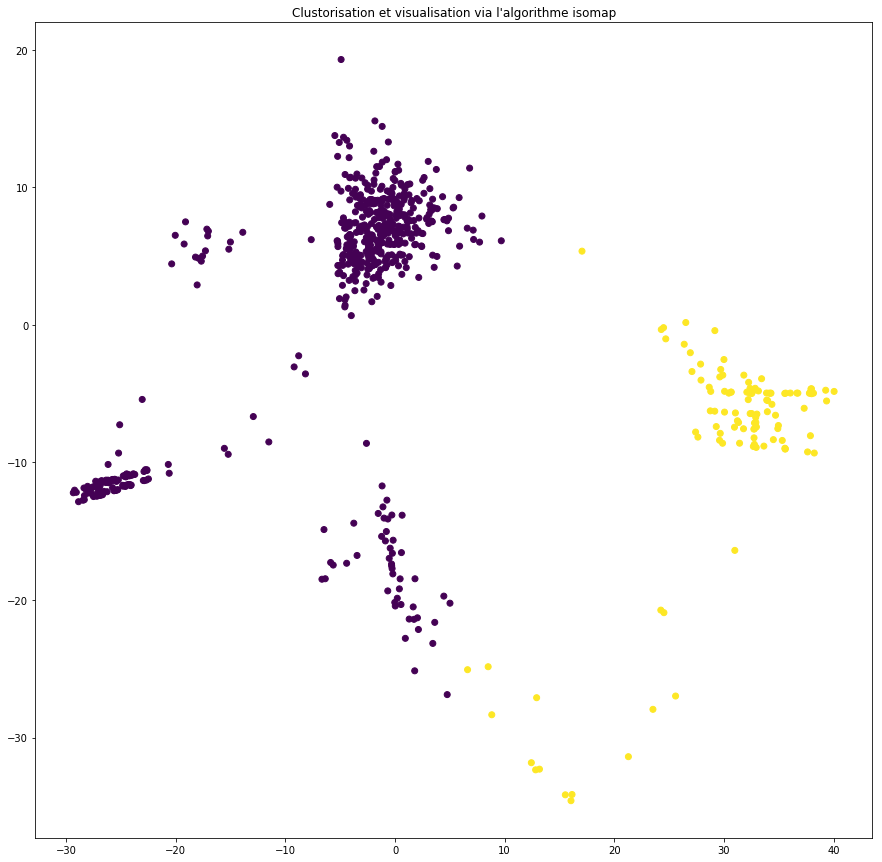

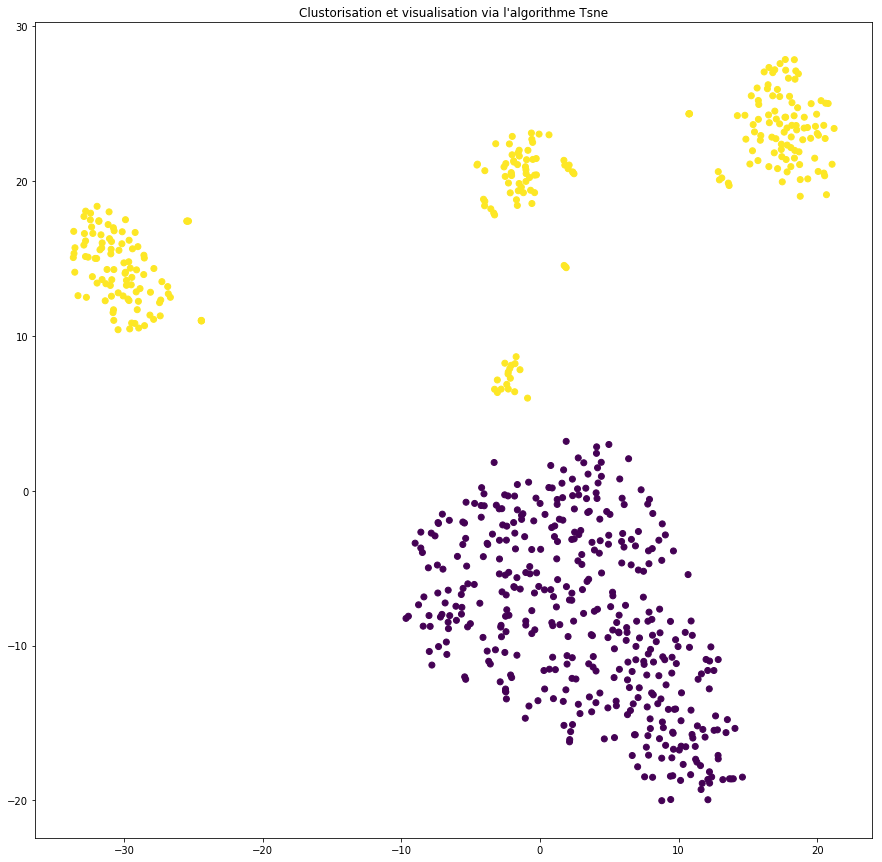

pourcentage de variance expliqué en deux dimensions
0.5826753754559224


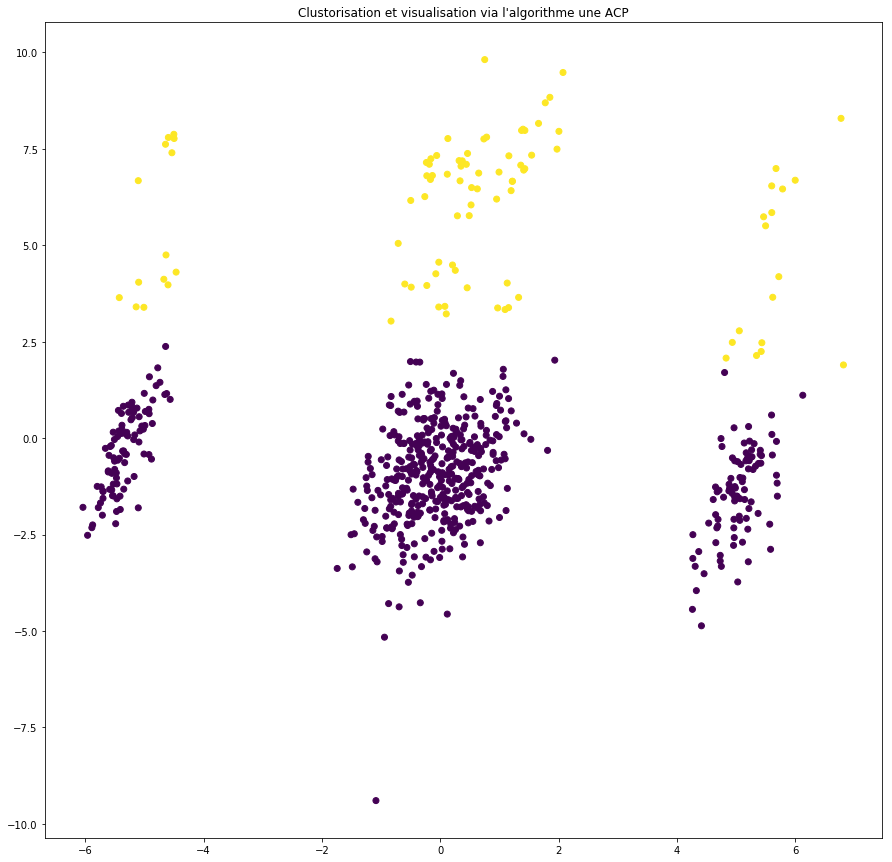

In [24]:
# Un maximum (3)

# visualisation des groupes utilisateurs

visualisation_reduite_robust(df=mod_train,n_clusters=2)

In [28]:
# appliquer le k-means

df_test = mod_train

# standardiser les données 
df_test = QuantileTransformer(output_distribution='normal').fit_transform(df_test)


kmeans = KMeans(n_clusters=2,init='k-means++' ,random_state=0).fit(df_test)

dim = df_test.shape[0]

# interprétation 

# visualiser les valeurs statistiques des caractéristiques de chaque clusters (moyenne/mediane/variance)
clusters = [0.,1]

# moyenne 

nb_unit = []
prix_unit = []
montant = []
pays = []
nb_produit_diff = []
nb_produit_id = []
frequence = []
jourmax = []
heuremax = []
jourprob = []
heureprob = []
prop1 = []
prop2 = []
month = []



# dimension du cluster

dimension = []

# préparer les données pour l'enregistrement

label_save = kmeans.labels_
df_testsave = df_test



# convertir kmeans.labels_ en vecteur
kmeans.labels_ = np.matrix((kmeans.labels_))
kmeans.labels_ = np.transpose(kmeans.labels_)



for l in range (len(clusters)):
    
    X_inter = np.concatenate((df_test,kmeans.labels_), axis=1) 
    
    
    X_inter = X_inter[[np.where(X_inter[:,14] == clusters[l])]]   
    
    
    nb_unit.append(np.mean(X_inter[0,:,0]))
    prix_unit.append(np.mean(X_inter[0,:,1]))
    montant.append(np.mean(X_inter[0,:,2]))
    pays.append(np.mean(X_inter[0,:,3]))
    nb_produit_diff.append(np.mean(X_inter[0,:,4]))
    nb_produit_id.append(np.mean(X_inter[0,:,5]))
    frequence.append(np.mean(X_inter[0,:,6]))
    jourmax.append(np.mean(X_inter[0,:,7]))
    heuremax.append(np.mean(X_inter[0,:,8]))
    jourprob.append(np.mean(X_inter[0,:,9]))
    heureprob.append(np.mean(X_inter[0,:,10]))
    prop1.append(np.mean(X_inter[0,:,11]))
    prop2.append(np.mean(X_inter[0,:,12]))
    month.append(np.mean(X_inter[0,:,13]))
    
    # dimension en pourcentage
    dimension.append(X_inter.shape[1]*100/dim)
    
# arranger les données dans un dataframe pandas 


d = {'clusters':clusters[:],'nb_unit':nb_unit[:],'prix_unit':prix_unit[:],
     'montant':montant[:],'pays':pays[:],'nb_produit_diff':nb_produit_diff[:],'nb_produit_id':nb_produit_id[:],
     'frequence':frequence[:],'jourmax':jourmax[:],'heuremax':heuremax[:],'jourprob':jourprob[:],'heureprob':heureprob[:],
     'prop1':prop1,'prop2':prop2,'month':month,'dimension':dimension[:]
    }

stat_cluster = pd.DataFrame(data=d)

stat_cluster

,clusters,nb_unit,prix_unit,montant,pays,nb_produit_diff,nb_produit_id,frequence,jourmax,heuremax,jourprob,heureprob,prop1,prop2,month,dimension
0,0.0,1.414634,-0.213411,0.066377,-0.032053,-0.497990,-4.694594,-3.528349,-0.156051,-0.147507,-1.31927,-1.297370,0.046425,-0.081073,-1.247303,13.913043
1,1.0,-0.228589,0.034300,-0.010627,0.004930,0.044679,0.255939,0.168093,0.018717,0.026012,0.21310,0.209535,-0.007535,0.013337,0.201500,86.086957


In [33]:
# on donne un nom caractéristique à chaque cluster et on enregistre les données : 
   
save_map = pd.DataFrame(data=df_test)  
save_map['cluster'] = label_save[:]


cluster_num = [0,1]

cluster_annot = [ 
                'Montant plutôt élevé, de clients souvent britaniques, très irrégulières, avec peu de transactions redondantes et peu de produits différents par commande',
                'Montant plutôt faible de clients souvent britaniques, assez réguliers, de produits plutôt populaires'              
                ]

label_liste = []
for i in range (len(kmeans.labels_)):
    label_liste.append(kmeans.labels_[i])


d = {'user':df_train.iloc[:,1],'label':label_liste[:]}
user_label = pd.DataFrame(data=d)

d = {'cluster_num':cluster_num[:],'cluster_annot':cluster_annot[:]}
cluster_annot = pd.DataFrame(data=d)


In [34]:
# sauvegarde : 
user_label.to_csv('user_label_m.csv')
save_map.to_csv("savemap_m.csv")
cluster_annot.to_csv('cluster_annot_m.csv')

# Segmenter sur les  6  premiers mois 

In [18]:
# importer les données 

df = pd.read_csv('df_tr2.csv')

In [19]:
mod_train = np.matrix(df.iloc[:,2::])

In [20]:
coef_df = entrainement_model2_robust(mod_data=mod_train)

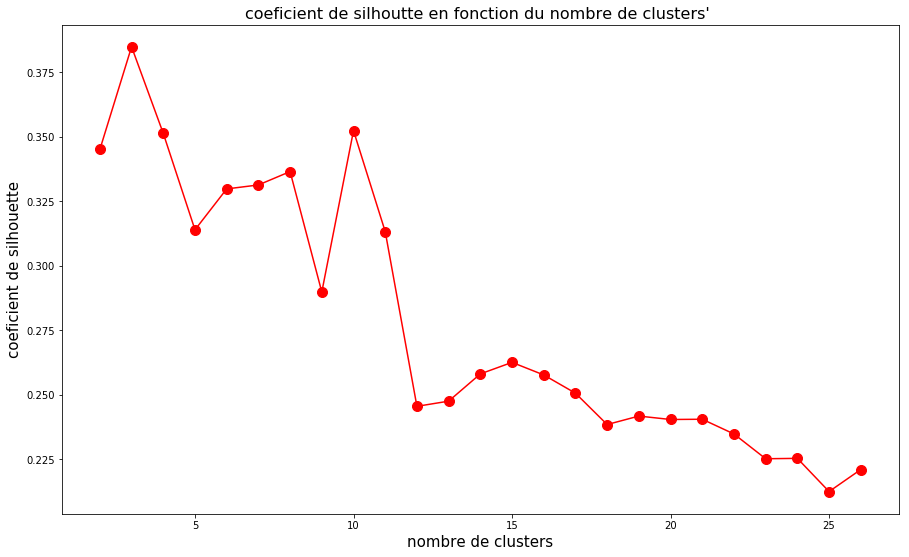

In [13]:
# visualisation des coeficients 
f, (ax1) = plt.subplots(1, 1, figsize=(15, 9), sharex=True)

plt.plot(coef_df.iloc[:,0], coef_df.iloc[:,1],'-', markersize=6, c='red')
plt.plot(coef_df.iloc[:,0], coef_df.iloc[:,1],'ro', markersize=10, c='red')
#plt.plot(coef_tot.iloc[:,0], coef_tot.iloc[:,2],'ro', markersize=6, c='blue')
plt.title("coeficient de silhoutte en fonction du nombre de clusters' ",fontsize=16)

ax1.set_xlabel("nombre de clusters",fontsize=15)
ax1.set_ylabel("coeficient de silhouette",fontsize=15)
plt.savefig('pict_reg_time1', dpi=400)
plt.show()

In [21]:
# appliquer le k-means

df_test = mod_train

# standardiser les données 
df_test = QuantileTransformer(output_distribution='normal').fit_transform(df_test)


kmeans = KMeans(n_clusters=3,init='k-means++' ,random_state=0).fit(df_test)

dim = df_test.shape[0]

# interprétation 

# visualiser les valeurs statistiques des caractéristiques de chaque clusters (moyenne/mediane/variance)
clusters = [0.,1.,2.]

# moyenne 

last_trans = []
nb_unit = []
prix_unit = []
montant = []
pays = []
nb_produit_diff = []
nb_produit_id = []
frequence = []
jourmax = []
heuremax = []
jourprob = []
heureprob = []
prop1 = []
prop2 = []



# dimension du cluster

dimension = []

# préparer les données pour l'enregistrement

label_save = kmeans.labels_
df_testsave = df_test



# convertir kmeans.labels_ en vecteur
kmeans.labels_ = np.matrix((kmeans.labels_))
kmeans.labels_ = np.transpose(kmeans.labels_)



for l in range (len(clusters)):
    
    X_inter = np.concatenate((df_test,kmeans.labels_), axis=1) 
    
    
    X_inter = X_inter[[np.where(X_inter[:,14] == clusters[l])]]   
    
    last_trans.append(np.mean(X_inter[0,:,0]))
    nb_unit.append(np.mean(X_inter[0,:,1]))
    prix_unit.append(np.mean(X_inter[0,:,2]))
    montant.append(np.mean(X_inter[0,:,3]))
    pays.append(np.mean(X_inter[0,:,4]))
    nb_produit_diff.append(np.mean(X_inter[0,:,5]))
    nb_produit_id.append(np.mean(X_inter[0,:,6]))
    frequence.append(np.mean(X_inter[0,:,7]))
    jourmax.append(np.mean(X_inter[0,:,8]))
    heuremax.append(np.mean(X_inter[0,:,9]))
    jourprob.append(np.mean(X_inter[0,:,10]))
    heureprob.append(np.mean(X_inter[0,:,11]))
    prop1.append(np.mean(X_inter[0,:,12]))
    prop2.append(np.mean(X_inter[0,:,13]))
    
    # dimension en pourcentage
    dimension.append(X_inter.shape[1]*100/dim)
    
# arranger les données dans un dataframe pandas 


d = {'clusters':clusters[:],'last_trans':last_trans[:],'nb_unit':nb_unit[:],'prix_unit':prix_unit[:],
     'montant':montant[:],'pays':pays[:],'nb_produit_diff':nb_produit_diff[:],'nb_produit_id':nb_produit_id[:],
     'frequence':frequence[:],'jourmax':jourmax[:],'heuremax':heuremax[:],'jourprob':jourprob[:],'heureprob':heureprob[:],
     'prop1':prop1,'prop2':prop2,'dimension':dimension[:]
    }

stat_cluster = pd.DataFrame(data=d)

stat_cluster

,clusters,last_trans,nb_unit,prix_unit,montant,pays,nb_produit_diff,nb_produit_id,frequence,jourmax,heuremax,jourprob,heureprob,prop1,prop2,dimension
0,0.0,0.528250,-0.102801,0.047667,-0.062608,5.199338,-0.235944,-4.431109,-4.934481,-0.075459,-0.005327,-0.629399,-0.612719,-0.046477,-0.048748,42.932187
1,1.0,-0.469333,0.027845,-0.011309,0.001579,5.199338,0.021215,0.296345,0.737234,0.078475,0.037131,0.528174,0.513165,0.058307,0.068246,48.280802
2,2.0,-0.004362,0.291779,-0.169604,0.297855,-5.199338,0.223114,-2.187838,-1.903537,-0.531813,-0.196848,0.164843,0.164467,-0.094243,-0.138076,8.787011


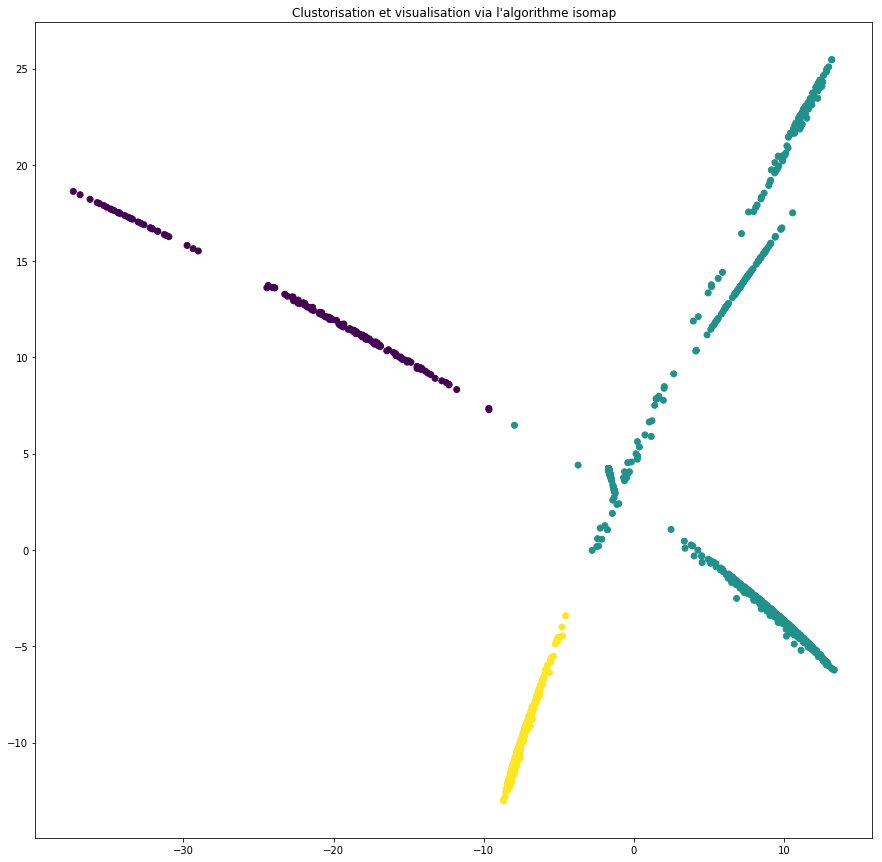

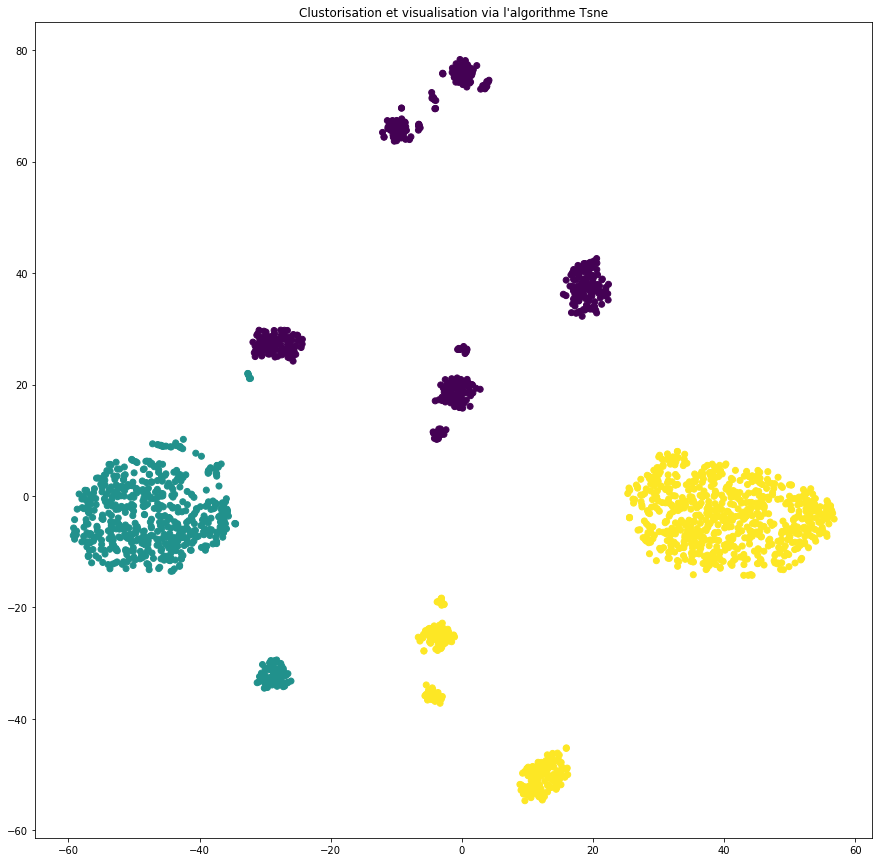

pourcentage de variance expliqué en deux dimensions
0.5656687445960757


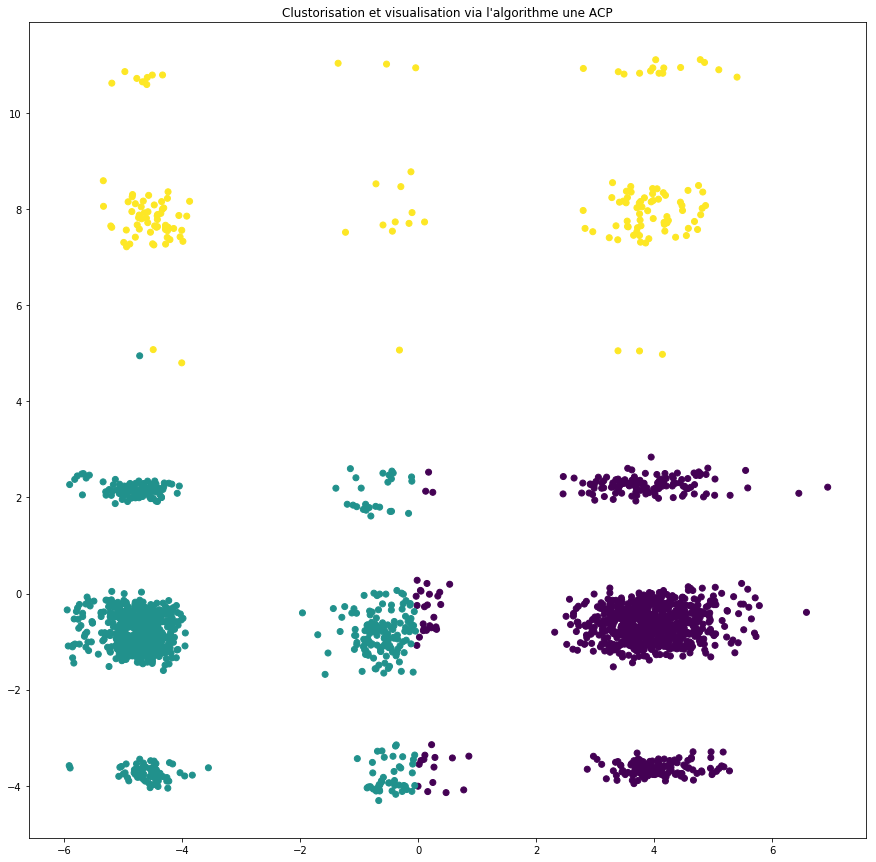

In [17]:

# visualisation des groupes utilisateurs

visualisation_reduite_robust(df=mod_train,n_clusters=3)

In [22]:
# on donne un nom caractéristique à chaque cluster et on enregistre les données : 
   
save_map = pd.DataFrame(data=df_testsave)  
save_map['cluster'] = label_save[:]


cluster_num = [0,1,2]


label_liste = []
for i in range (len(kmeans.labels_)):
    label_liste.append(kmeans.labels_[i])


d = {'user':df.iloc[:,1],'label':label_liste[:]}
user_label = pd.DataFrame(data=d)

# sauvegarde : 
user_label.to_csv('user_labeln2.csv')
save_map.to_csv("savemapn2.csv")
